# Limpieza de texto
### Creación de los dataframe y limpieza de texto

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

df = pd.read_csv('pericias_medicas.csv', sep=',',  encoding='utf-8')
#convierte en string los datos de la columna text
df1 = df['text'].apply(str)

In [2]:
# Limpieza de texto
# Primera etapa de la limpieza de texto
import re, string, unicodedata
'''
Se hace la eliminacion de texto entre corchetes, acentos, signos de puntuacion (excepto . y :), palabras con numeros.
Se eliminan los espacios de sobra
Se eliminan \r, \t, \v, \f, \a
'''
def limpiarTexto1(txt: str, bert=False, nums=False) -> str:
    """
    Elimina caracteres no deseados
    Params:
        **txt**:texto a ser limpiado de caracteres no desaeados
    """
    if nums:
        txt = re.sub(r'\d+', ' ', txt)
    if not bert:
        txt = txt.translate(str.maketrans(
            'áéíóúýàèìòùÁÉÍÓÚÀÈÌÒÙÝ', 'aeiouyaeiouAEIOUAEIOUY'))

    '''
    Eliminamos caracteres especiales: tabulador horizontal(\t), tabulador vertical(\v), 
    retorno de carro(\r), avance de pagina(\f), 
    caracter de retroceso: Marca el límite de una palabra(\b), 
    '''
    txt = txt.replace('\r', ' ').replace("\v", ' ').replace(
        "\t", ' ').replace("\f", ' ').replace("\a", ' ').replace("\b", ' ')
    txt = re.sub(' +', ' ', txt)
    txt = txt.strip()
    return txt
df1 = df1.apply(str)
df1 = df1.apply(limpiarTexto1)

In [3]:
# Segunda fase de limpieza
# Se eliminan todos los elementos que meten ruido al texto y que no fueron eliminados en la fase de limpieza 1.
import re

def limpiarTexto2(text):
    text = re.sub('^ ',' ',text)
    text = re.sub('\n +\n','\n',text)
    text = re.sub(' +\n\n','\n',text)
    text = re.sub('\n\n+','\n',text)
    text = re.sub(' \n','\n',text)
    text = re.sub('\d\n','',text)
    text = re.sub('\x0c','',text)
    text = re.sub('\u200b\n','',text)
    text = re.sub('\d{3,100}','',text)
    text = re.sub('\d+-\d+','',text)
    text = re.sub('\x0c','',text)
    text = re.sub('[nN]º|[nN][. ]º','',text)
    text = re.sub('[º<>/]','',text)
    text = re.sub('\d{3,100}','',text)
    text = re.sub('[a-zA-z-.]+@[a-zA-Z]+.com','',text)
    return text

df1 = df1.apply(limpiarTexto2)

In [4]:
# Tercera fase de limpieza
# Eliminamos las lineas que no son de utilidad para el analisis o que van a afectar los resultados del mismo.
# Ejemplo de linea eliminada: las lineas que comienzan con "Se encuentra contestada en....."
import re

def limpiarTexto3(text):
    text = re.sub('[a-z1-9.]+[).-] [s|S]e encuentra contestad[a|o] .+[. \n]','',text)
    text = re.sub('[0-9]+[. ]+[yY]a fue contestado.+[.\n]','',text)
    text = re.sub('[fF]oja [1-9].+\n', '', text)
    text = re.sub('[pP]regunta[ 0-9]+[)].+\n|[rR]espuesta[ 0-9]+[)].+\n','',text)#elimina oraciones comenzadas en preguta/respuesta.
    text = re.sub('V[. ]+[S\n\.]+', '', text)
    #text = re.sub('[IV]+.[A-Z]{1,3}[\n.]', '', text)
    text = re.sub('[I][.][P][.]','',text)
    text = re.sub('[I][.][T][.]','',text)
    text = re.sub('[I][.][A][.]','',text)
    text = re.sub('[I][.][L][.]','',text)
    text = re.sub('[I][.][B][.]','',text)
    text = re.sub('[I][.][N][.]','',text)
    text = re.sub('[I][.][V][.]','',text)
    text = re.sub('[V][.][M][.]','',text)
    text = re.sub('[V][.][A][.]','',text)

    return text

dfLimpio = df1.apply(limpiarTexto3)
dfLimpio = dfLimpio.apply(limpiarTexto2)
#pprint(dfLimpio[0])

# Busqueda de titulos

In [5]:
# Busca títulos en mayusculas
def buscarTitulosMayusculas(text):
    # Expresiín regular para encontrar títulos en mayusculas.
    tituloMayusculas =re.compile(r'(I{1,3}|IV|V|VI{1,3}|IX|X)[-.) ]+[A-Z -]+[:\.\n]') #[1-9]|
    titulosMayusculasEncontrados = []

    for m in tituloMayusculas.finditer(text):
        if len(m.group()) > 8:
            titulosMayusculasEncontrados.append(m.group())

    return titulosMayusculasEncontrados
# titulosMAyuscula: lista que guarda los títulos en mayusculas
titulosMayusculas=[]
for expediente in dfLimpio:
    titulosMayusculas.append(buscarTitulosMayusculas(expediente))

dfTitulosMayusculasConStops = pd.DataFrame(titulosMayusculas)


In [6]:
titulosMayusculas

[['I-PROEMIO:',
  'II-ANTECEDENTES DE INTERES MEDICO-LEGAL:',
  'III-EXAMEN FISICO DEL ACTOR:',
  'IV-CONSIDERACIONES MEDICO-LEGALES:',
  'VII-CONCLUSIONES.',
  'VII-INCAPACIDAD:',
  'VIII CONTESTACION DE LOS PUNTOS DE PERICIA:',
  'IX-PETITORIO:'],
 ['II). PREAMBULO.',
  'III). ANTECEDENTES DE INTERES MEDICO PRESENTE EN AUTOS.',
  'IV) EXAMEN DEL PERITO DE OFICIO.',
  'V) CONSIDERACIONES MEDICAS:',
  'VII) CONTESTACION DE PUNTOS PERICIALES.',
  'VIII) BIBLIOGRAFIA.',
  'VII) CONCLUSIONES:',
  'IX). PETITORIO.'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['II.- HISTORIA CLINICA\n',
  'IV.- PUNTOS PERICIALES\n',
  'III.- ESTUDIOS SOLICITADOS\n',
  'V.- CONSIDERACIONES Y CONCLUSIONES MEDICO LEGALES\n'],
 ['I- PROEMIO\n',
  'III- EVALUACION CLINICA:',
  'V- INCAPACIDAD\n',
  'VI- CONSIDERACIONES MEDICO LEGALES\n',
  'VII- CONCLUSION:',
  'VIII- BIBLIOGRAFIA CONSULTADA:',
  'IX- PETITORIO\n'],
 [],
 ['X AMBOS PIES FRENTE Y OBLICUA:'],
 ['I.- DATOS PERSONALES\n',
  'II.- MOTIVO DE RECLAMO Y DATOS LABO

# Creacion de dataframe de solo titulos en mayusculas

In [7]:
# Creamos un dataframe para guardar expedientes que solamente tienen titulos en mayusculas
#dfTitulosMayusculas = pd.DataFrame(columns=['id', 'expediente'])

# Guardo en dfTitulosMayusculas los expedientes y su indice dentro del dataframe limpio (con todos los expedientes)
expConTitulosMayusculas = []
for id,titulo in  enumerate(dfLimpio):
    if len(titulosMayusculas[id]) > 0:
        expConTitulosMayusculas.append((id,titulo))

dfTitulosMayusculas = pd.DataFrame(expConTitulosMayusculas, columns=['id','expediente'])
pprint(dfTitulosMayusculas)

        id                                         expediente
0        0  Informa a continuacion:\nJ.T. 1PERITO MEDICO P...
1        1  JUZG. 4PERITO MEDICO PRESENTA INFORME MEDICO-P...
2        8  II.- HISTORIA CLINICA\nPERITO MEDICO PRESENTA ...
3        9  JNT  67, Sito en Calle Lavalle  , Ciudad Auton...
4       11  SR. JUEZ:\nJUZGADO NACIONAL DEL TRABAJO  4PERI...
...    ...                                                ...
1269  3791  PERITO MEDICO PRESENTA PERITACION MEDICOLEGAL\...
1270  3795  Juzgado del Trabajo Nro 4Lavalle 4to piso\nADJ...
1271  3798  PERITO MEDICO PRESENTA PERITACION MEDICO LEGAL...
1272  3801  -TRABAJO  7PRESENTO PERICIA MEDICA - ADJUNTO E...
1273  3803  II.- HISTORIA CLINICA\n) se dirige a  y respet...

[1274 rows x 2 columns]


In [8]:
dfTitulosMayusculas.to_excel('titulos_mayusculas.xlsx', index=False)

### Expedientes con titulos en mayusculas sobre el total de expedientes

In [9]:
print(f'''
Cantidad de expediente que tienen titulos en mayusculas:        {len(dfTitulosMayusculas)}
Cantidad de expedientes que no tienen titulos en mayusculas:    {len(dfLimpio) - len(dfTitulosMayusculas)}  
Total de expedientes: {len(dfLimpio)} 
''')


Cantidad de expediente que tienen titulos en mayusculas:        1274
Cantidad de expedientes que no tienen titulos en mayusculas:    2532  
Total de expedientes: 3806 



<module 'matplotlib.pyplot' from 'c:\\Users\\gasto\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

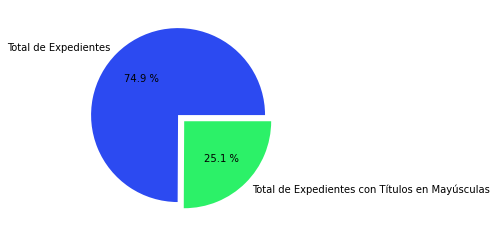

In [10]:
# Creo un grafico de torta
import matplotlib.pyplot as plt

totalExp = len(dfLimpio)
totalExpMayusculas = len(dfTitulosMayusculas)

# Creación de grafico de torta de la cantidad de expedientes con títulos en mayúsculas sobre el total de expedientes.
cantExp = [totalExp, totalExpMayusculas]
nombreTitulos = ['Total de Expedientes', 'Total de Expedientes con Títulos en Mayúsculas']
colores = ['#2C4AF1','#2CF168']
desfase=(0,0.1)

plt.pie(cantExp, labels=nombreTitulos, autopct= '%0.1f %%', colors=colores, explode=desfase) #, explode=desfase
plt

## Titulos y ubicacion

In [52]:
# Encontrar la ubicacion del titulo en el documento
titulosPosicion=[]

for titulo in titulosMayusculas[0]:
    inicioTitulo = dfLimpio[0].index(titulo)
    palabrasPorTitulo = len(titulo)
    finalTitulo = inicioTitulo + palabrasPorTitulo
    titulosPosicion.append((titulo, inicioTitulo, finalTitulo, palabrasPorTitulo))

pprint(titulosPosicion)


#anotar parrafos entre titulos.
#parrafo = texto[inicio:inicio+1]
#mostrar las secciones
#estadisiticas de titulos interdocumentos

[('I-PROEMIO:', 161, 171, 10),
 ('II-ANTECEDENTES DE INTERES MEDICO-LEGAL:', 690, 730, 40),
 ('III-EXAMEN FISICO DEL ACTOR:', 1646, 1674, 28),
 ('IV-CONSIDERACIONES MEDICO-LEGALES:', 9140, 9174, 34),
 ('VII-CONCLUSIONES.', 19171, 19188, 17),
 ('VII-INCAPACIDAD:', 20974, 20990, 16),
 ('VIII CONTESTACION DE LOS PUNTOS DE PERICIA:', 21297, 21340, 43),
 ('IX-PETITORIO:', 21411, 21424, 13)]


In [54]:
# Creo una variable que contiene el párrafo de un título en particular
parrafoConsideraciones = dfLimpio[0][21411:]
#pprint(parrafoConsideraciones)
len(parrafoConsideraciones)

555

# DATAFRAME DE UBICACIÓN DE TÍTULOS

In [116]:
# Encontrar la ubicacion del titulo en el documento
titulosPosicion1=[]

for i in range(len(dfLimpio)):
    for titulo in titulosMayusculas[i]:
        inicioTitulo = dfLimpio[i].index(titulo)
        palabrasPorTitulo = len(titulo)
        finalTitulo = inicioTitulo + palabrasPorTitulo
        titulosPosicion1.append((i,titulo, inicioTitulo, finalTitulo, palabrasPorTitulo))

dfUbicacionTitulos = pd.DataFrame(titulosPosicion1,columns=['id','titulo','inicio','fin','longitud'])

## Calculo de la longitud de los parrafos

In [ ]:
# Calculo la longitud de caracteres de parrafos
parrafos=[]
for i in range(len(dfUbicacionTitulos)):
    if i < len(dfUbicacionTitulos)-1:
        inicio = dfUbicacionTitulos['inicio'][i]
        fin = dfUbicacionTitulos['inicio'][i+1]
        caracteres = fin - inicio
        if caracteres < 0:
            idDf = dfUbicacionTitulos['id'][i]
            caracteres = len(dfLimpio[idDf][inicio:])
        parrafos.append(caracteres)
    else:
        idDf = dfUbicacionTitulos['id'][i]
        caracteres = len(dfLimpio[idDf][inicio:])
        parrafos.append(caracteres)

parrafos

In [ ]:
dfUbicacionTitulos['longitud_parrafo'] = pd.DataFrame(parrafos)

# CREACION DE DOCUMENTO HTML
## MUESTRO LOS TITULOS Y PARRAFOS ENCONTRADOS

In [15]:
# Creamos un dataframe para colocar el salto de linea en formato HTML
dfLimpioHTML = dfLimpio.apply(str)
def limpiarTextoHTML(text):
    text = text.strip().replace('\n','<br>')
    return text

dfLimpioHTML = dfLimpioHTML.apply(limpiarTextoHTML)
parrafoConsideraciones = limpiarTextoHTML(parrafoConsideraciones)

In [16]:
colors = {
    'procedimientos': '#cd5c5c',
    'cuerpos': '#99ccff',
    'afecciones': '#ffa500'
}

body = f'''
        <p>
        {dfLimpioHTML[1]}
        </p>
        <br>
        '''
body = body.replace(parrafoConsideraciones,f'<span style="background-color: #99ccff">{parrafoConsideraciones}</span>')
for titulo in titulosMayusculas[1]:
    body = body.replace(titulo,f'<span style="background-color: #cd5c5c">{titulo}</span>')
with open('parrafos.html','w', encoding="utf-8") as f:
    f.write(body)

In [17]:
# contar las oraciones por parrafo.
# contar oraciones por parrafo.

In [18]:
#dfLimpio[742]